In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
import seaborn as sns

In [234]:
wine_data = "Datasets/winemag-data-130k-v2.csv"

In [235]:
wine_data_df = pd.read_csv(wine_data)

In [271]:
wine_data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [237]:
wine_data_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [266]:
reduced_wine_data_df = wine_data_df[["country", "points", "price", "variety", "province", "winery"]]
reduced_wine_data_df

,country,points,price,variety,province,winery
0,Italy,87,NaN,White Blend,Sicily & Sardinia,Nicosia
1,Portugal,87,15.0,Portuguese Red,Douro,Quinta dos Avidagos
2,US,87,14.0,Pinot Gris,Oregon,Rainstorm
3,US,87,13.0,Riesling,Michigan,St. Julian
4,US,87,65.0,Pinot Noir,Oregon,Sweet Cheeks
5,Spain,87,15.0,Tempranillo-Merlot,Northern Spain,Tandem
6,Italy,87,16.0,Frappato,Sicily & Sardinia,Terre di Giurfo
7,France,87,24.0,Gewürztraminer,Alsace,Trimbach
8,Germany,87,12.0,Gewürztraminer,Rheinhessen,Heinz Eifel
9,France,87,27.0,Pinot Gris,Alsace,Jean-Baptiste Adam


In [239]:
drop_na_df = reduced_wine_data_df.dropna()

In [240]:
drop_na_df.count()

country     120915
points      120915
price       120915
variety     120915
province    120915
winery      120915
dtype: int64

In [241]:
#groupbys for dataset
country_group = drop_na_df.groupby("country")
province_group = drop_na_df.groupby("province")
winery_group = drop_na_df.groupby("winery")
variety_group = drop_na_df.groupby("variety")
country_by_province = drop_na_df.groupby(["country", "province"])
country_by_province.mean()
country_by_variety = drop_na_df.groupby(["country", "variety"])
country_group.mean()

,points,price
country,,
Argentina,86.710330,24.510117
Armenia,87.500000,14.500000
Australia,88.595466,35.437663
Austria,90.190782,30.762772
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.659574,23.765957
Bulgaria,87.936170,14.645390
Canada,89.377953,35.712598
Chile,86.495130,20.787316


In [242]:

most_produced_varieties= drop_na_df.groupby("variety").count()["points"].sort_values(ascending = False)
most_produced_varieties_df = pd.DataFrame({"Number of Bottles":most_produced_varieties})
top_10_varieties = most_produced_varieties_df.iloc[0:10, :].index.to_list()
top_10_varieties

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [243]:
country_production = drop_na_df["country"].value_counts()

In [244]:
#Number of bottles with score greater than 80 indexed by country in descending order
sort_production_df = pd.DataFrame({"Bottles with Score >80":country_production})
#iloc df of top 10 producers for graphing
top_10_producers = sort_production_df.iloc[0:10,:]
top_10_producers

,Bottles with Score >80
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294
Germany,2120


In [245]:
#average score in descending order
avg_points_descending=country_group.mean()["points"].sort_values(ascending=False)
sort_scores = pd.DataFrame({"Average Score":avg_points_descending})
#iloc of top 10 scorers for graphing (convert to value_counts for series if needed)
top_10_scorers_df = sort_scores.iloc[0:10,:]
#list for loc searching of dataframes
top_10_scorers_list = top_10_scorers_df.index.to_list()


In [246]:
#Dataframe of top 10 producers average score (optional sort by descending)
top_10_producers_list = top_10_producers.index.to_list()
top_10_producers_scores = sort_scores.loc[top_10_producers_list,:]
top_10_producers_scores.sort_values(by = "Average Score", ascending = False)





,Average Score
country,
Austria,90.190782
Germany,89.836321
France,88.734867
Italy,88.618186
Australia,88.595466
US,88.566387
Portugal,88.316718
Spain,87.290735
Argentina,86.710330


In [247]:
#highest scoring varieties
mean_by_variety = variety_group.mean()
top_varieties = mean_by_variety.sort_values(by=["points"], ascending = False)
#most reviewed varieties
most_pop_varieties = variety_group.count().sort_values(by = ['points'], ascending = False)
top_10_varieties = most_pop_varieties.iloc[0:10,:].index.to_list()
#top 10 number of reviews by score and price
top_10_varieties_df = mean_by_variety.loc[top_10_varieties, :]
top_10_varieties_df.sort_values(by = ['points'], ascending = False)
top_10_producers

,Bottles with Score >80
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294
Germany,2120


In [248]:
select_countries = ['US','France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria', 'Australia', 'Germany']
select_df = drop_na_df[drop_na_df['country'].isin(select_countries)]

select_df.to_csv("cleaned_countries.csv")


In [249]:
#Dataframes of top 10 varieties 
riesling_df = select_df[select_df['variety']=="Riesling"]
pinot_noir_df = select_df[select_df['variety']=="Pinot Noir"]
syrah_df = select_df[select_df['variety']=="Syrah"]
bordeaux_df = select_df[select_df['variety']=="Bordeaux-style Red Blend"]
cabernet_sauvignon_df = select_df[select_df['variety']=="Cabernet Sauvignon"]
red_blend_df = select_df[select_df['variety']=="Red Blend"]
chardonnay_df = select_df[select_df['variety']=="Chardonnay"]
sauvignon_blanc_df = select_df[select_df['variety']=="Sauvignon Blanc"]
rose_df = select_df[select_df['variety']=="Rosé"]
merlot_df = select_df[select_df['variety']=="Merlot"]
#I can set the indexes by country for these if we want to run some ttests,
#just be warned i was told that this was bad practice

In [250]:
rose_df

,country,points,price,variety,province,winery
83,Australia,86,20.0,Rosé,South Australia,Mitolo
337,France,83,16.0,Rosé,Languedoc-Roussillon,Château Notre Dame du Quatourze
338,France,82,11.0,Rosé,Provence,Mémoires
425,US,89,18.0,Rosé,New York,Lieb
499,France,87,20.0,Rosé,Provence,Domaine du Grand Cros
500,Spain,87,11.0,Rosé,Northern Spain,El Coto
552,France,93,20.0,Rosé,Provence,Château Vignelaure
554,France,93,40.0,Rosé,Provence,Mas de Cadenet
574,France,89,11.0,Rosé,Rhône Valley,Château de Campuget
577,US,89,17.0,Rosé,New York,Chateau Lafayette Reneau


In [251]:
#Mean groupbys of top 10 varieties by country
#These are means, not counts, and are necessarily means of score *and* price by country for varieties of wine
#You can get these values by grouping by country and variety, but these are simplified dataframes for easy graphing

riesling_mean = riesling_df.groupby("country").mean()
pinot_noir_mean = pinot_noir_df.groupby("country").mean()
syrah_mean = syrah_df.groupby("country").mean()
bordeaux_mean = bordeaux_df.groupby("country").mean()
cabernet_mean = cabernet_sauvignon_df.groupby("country").mean()
red_blend_mean = red_blend_df.groupby("country").mean()
chardonnay_mean = chardonnay_df.groupby("country").mean()
sauvignon_mean = sauvignon_blanc_df.groupby("country").mean()
rose_mean = rose_df.groupby("country").mean()
merlot_mean = merlot_df.groupby("country").mean()


In [252]:
country_point = "Datasets/cleaned_countries.csv"

In [253]:
country_point_df = pd.read_csv(country_point)

In [254]:
country_point_df.head(10)

,Unnamed: 0,country,points,price,variety,province,winery
0,1,Portugal,87,15.0,Portuguese Red,Douro,Quinta dos Avidagos
1,2,US,87,14.0,Pinot Gris,Oregon,Rainstorm
2,3,US,87,13.0,Riesling,Michigan,St. Julian
3,4,US,87,65.0,Pinot Noir,Oregon,Sweet Cheeks
4,5,Spain,87,15.0,Tempranillo-Merlot,Northern Spain,Tandem
5,6,Italy,87,16.0,Frappato,Sicily & Sardinia,Terre di Giurfo
6,7,France,87,24.0,Gewürztraminer,Alsace,Trimbach
7,8,Germany,87,12.0,Gewürztraminer,Rheinhessen,Heinz Eifel
8,9,France,87,27.0,Pinot Gris,Alsace,Jean-Baptiste Adam
9,10,US,87,19.0,Cabernet Sauvignon,California,Kirkland Signature


In [255]:
merlot_mean.sort_values(by = "points")

,points,price
country,,
Spain,84.933333,17.466667
Argentina,85.034483,17.758621
Chile,85.257812,12.925781
Australia,85.736842,20.684211
France,86.584906,24.500000
US,87.383913,28.765652
Portugal,88.750000,19.750000
Italy,89.594203,92.760870
Austria,91.500000,35.000000


In [256]:
us_df = select_df[select_df["country"]=="US"]
france_df = select_df[select_df["country"]=="France"]
italy_df = select_df[select_df["country"]=="Italy"]
spain_df = select_df[select_df["country"]=="Spain"]
portugal_df = select_df[select_df["country"]=="Portugal"]
chile_df = select_df[select_df["country"]=="Chile"]
argentina_df = select_df[select_df["country"]=="Argentina"]
austria_df = select_df[select_df["country"]=="Austria"]
australia_df = select_df[select_df["country"]=="Australia"]
germany_df = select_df[select_df["country"]=="Germany"]

In [257]:
us_df

,country,points,price,variety,province,winery
2,US,87,14.0,Pinot Gris,Oregon,Rainstorm
3,US,87,13.0,Riesling,Michigan,St. Julian
4,US,87,65.0,Pinot Noir,Oregon,Sweet Cheeks
10,US,87,19.0,Cabernet Sauvignon,California,Kirkland Signature
12,US,87,34.0,Cabernet Sauvignon,California,Louis M. Martini
14,US,87,12.0,Chardonnay,California,Mirassou
19,US,87,32.0,Meritage,Virginia,Quiévremont
20,US,87,23.0,Red Blend,Virginia,Quiévremont
21,US,87,20.0,Pinot Noir,Oregon,Acrobat
23,US,87,22.0,Merlot,California,Bianchi


In [258]:
select_df.groupby("variety").count().sort_values(by="country", ascending = False)

,country,points,price,province,winery
variety,,,,,
Pinot Noir,12191,12191,12191,12191,12191
Chardonnay,10656,10656,10656,10656,10656
Cabernet Sauvignon,9086,9086,9086,9086,9086
Red Blend,8083,8083,8083,8083,8083
Bordeaux-style Red Blend,5160,5160,5160,5160,5160
Riesling,4836,4836,4836,4836,4836
Sauvignon Blanc,3973,3973,3973,3973,3973
Syrah,3937,3937,3937,3937,3937
Rosé,3172,3172,3172,3172,3172


In [259]:
ten_by_ten_data = "Datasets/varieties_by_country.csv"

In [260]:
ten_by_ten_data_df = pd.read_csv(ten_by_ten_data, index_col=0)

In [261]:
ten_by_ten_data_df.head(10)

,Riesling,Pinot Noir,Syrah,Bordeaux,Cabernet,Red Blend,Chardonnay,Sauvignon Blanc,Rosé,Merlot
Argentina,86.00,85.61,85.79,89.85,86.06,88.42,84.94,84.35,84.08,85.03
Australia,88.98,87.35,91.62,89.14,89.23,87.83,87.34,87.02,87.25,85.74
Austria,91.50,90.43,89.00,90.50,87.40,90.09,90.19,89.51,88.02,91.50
Chile,86.00,85.92,88.00,90.14,86.68,88.95,85.14,85.97,84.23,85.26
France,90.66,89.77,89.88,88.16,85.43,88.13,89.30,88.42,87.29,86.58
Germany,90.08,89.44,NaN,NaN,NaN,86.75,89.40,NaN,89.00,NaN
Italy,87.91,86.83,88.87,89.50,89.18,88.85,88.23,86.84,86.02,89.59
Portugal,87.67,88.20,88.77,93.00,88.40,88.57,87.65,86.70,84.60,88.75
Spain,82.00,87.00,88.47,86.89,87.21,88.14,84.82,84.36,84.85,84.93
US,87.96,89.61,89.43,89.69,89.03,87.85,88.45,87.48,87.23,87.38


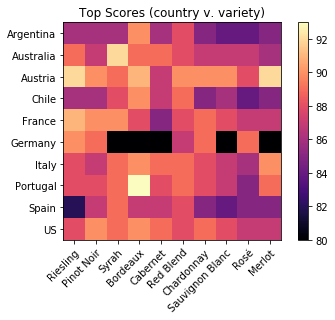

In [269]:
# MICHAEL'S CATEGORICAL HEATMAP

varieties = ['Riesling',
             'Pinot Noir',
             'Syrah',
             'Bordeaux',
             'Cabernet',
             'Red Blend',
             'Chardonnay',
             'Sauvignon Blanc',
             'Rosé',
             'Merlot']

country = ['Argentina',
           'Australia',
           'Austria',
           'Chile',
           'France',
           'Germany',
           'Italy',
           'Portugal',
           'Spain',
           'US',
           ]

scores = ([
    [86, 86, 86, 90, 86, 88, 85, 84, 84, 85],
    [89, 87, 92, 89, 89, 88, 87, 87, 87, 86],
    [92, 90, 89, 91, 87, 90, 90, 90, 88, 92],
    [86, 86, 88, 90, 87, 89, 85, 86, 84, 85],
    [91, 90, 90, 88, 85, 88, 89, 88, 87, 87],
    [90, 89, 80, 80, 80, 87, 89, 80, 89, 80],
    [88, 87, 89, 90, 89, 89, 88, 87, 86, 90],
    [88, 88, 89, 93, 88, 89, 88, 87, 85, 89],
    [82, 87, 89, 87, 87, 88, 85, 84, 85, 85],
    [88, 90, 89, 90, 89, 88, 89, 88, 87, 87]

])


fig, ax = plt.subplots()
im = ax.imshow(scores)

# We want to show all ticks...
ax.set_xticks(np.arange(len(varieties)))
ax.set_yticks(np.arange(len(country)))

# ... and label them with the respective list entries
ax.set_xticklabels(varieties)
ax.set_yticklabels(country)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set colorbar


ax.set_title("Top Scores (country v. variety)")
plt.imshow(scores, cmap='magma')

plt.colorbar()
plt.show()